In [1]:
%load_ext autoreload
%autoreload 2   

In [2]:
import numpy as np
import time
import pylablib as pll
import matplotlib.pyplot as plt
pll.par["dlls/andor_sdk3"] = "src/qdm/devices/andor" # path to Andor SDK3 dlls

from qdm.config.system import System
from qdm.measurements.esr import ESR

In [3]:
# create an object of the system and initalise the equipment
qdm = System(name = "cryo",
             config_file='../src/qdm/config/cryo.json') 


Connected to Camera: ZYLA-5.5-USB3-W
TCPIP0::169.254.33.129::inst0::INSTR
Rohde&Schwarz,SMB100A,1406.6000k02/106177,3.0.13.0-2.20.382.35



In [4]:
# qdm.rf.set_freq(2800)
# qdm.rf.set_power(-30)
# qdm.rf.set_rf_on()
qdm.rf.freq = 2870.5
qdm.rf.power = -28
qdm.rf.output = 0

In [5]:
# qdm.cam.set_roi(1*2048/4,3*2048/4,1*2048/4,3*2048/4, 1, 1) 
qdm.cam.image_size = (704, 704)
qdm.cam.bin = 1
print(qdm.cam.data_size)

Setting the roi to:  (928, 1632, 728, 1432)
(704, 704)


In [6]:
qdm.magnet.set_b(190, 54.7, 49)

Sweeping to new field value. Estimated sweeping time: 43.45 (s)
Field has not been reached yet
Field has not been reached yet
Field has not been reached yet
Field has not been reached yet
Field has not been reached yet
Field has not been reached yet
Field has not been reached yet
Field has not been reached yet
Field has not been reached yet
Field has not been reached yet
Field has been reached
B = 189.965 (mT)
NV freq approx [2449.0, 8189.0] (MHz)


In [7]:
_ = qdm.magnet.get_current()

Current field values
B = 189.969 (mT)
theta = 54.709 (deg)
phi = 48.999 (deg)
Upper frequency = 8189.1 (MHz))
Lower frequency = 2449.1 (MHz))


In [8]:
# create an object of the ODMR measurement
ODMR = ESR(qdm, 
                 int_time = 30e-3,
                 freq_start = 2300,
                 freq_stop = 2600,
                 freq_num = 51,
                 ref_bool = True,
                 ref_type = "no_rf",) 
qdm.cam.set_trigger_mode("ext_exp") # set up the trigger mode


In [11]:
#ODMR.multiple_measurements(number_of_measurements=3, plot_bool=False)
ODMR.start(num_sweeps = 3, continue_meas = False)

Measurement time per sweep:  3.06 (s)
Dead time per sweep: 0.55 (s)
50552832
50552832


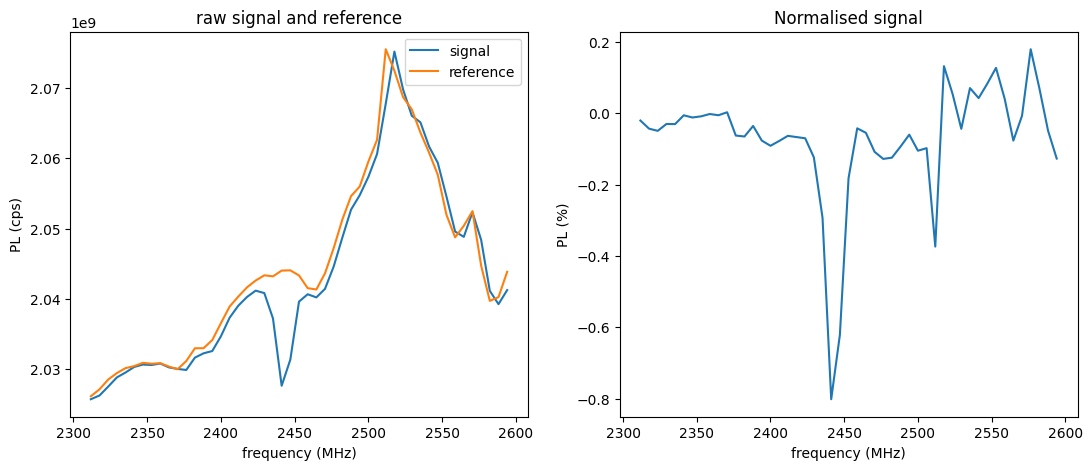

In [12]:
ODMR.get_results()
ODMR.plot_spectra(remove_start=2)

Sweeping to new field value. Estimated sweeping time: 3.16 (s)
Field has not been reached yet
Field has not been reached yet
Field has been reached
B = 189.984 (mT)
NV freq approx [2449.6, 8189.6] (MHz)
Measurement time per sweep:  3.06 (s)
Dead time per sweep: 0.209 (s)
Sweeping to new field value. Estimated sweeping time: 3.31 (s)
Field has not been reached yet
Field has not been reached yet
Field has not been reached yet
Field has been reached
B = 189.995 (mT)
NV freq approx [2449.9, 8189.9] (MHz)
Measurement time per sweep:  3.06 (s)
Dead time per sweep: 0.209 (s)
Sweeping to new field value. Estimated sweeping time: 2.77 (s)
Field has not been reached yet
Field has not been reached yet
Field has not been reached yet
Field has been reached
B = 189.977 (mT)
NV freq approx [2449.4, 8189.4] (MHz)
Measurement time per sweep:  3.06 (s)
Dead time per sweep: 0.209 (s)
Sweeping to new field value. Estimated sweeping time: 3.04 (s)
Field has not been reached yet
Field has not been reached y

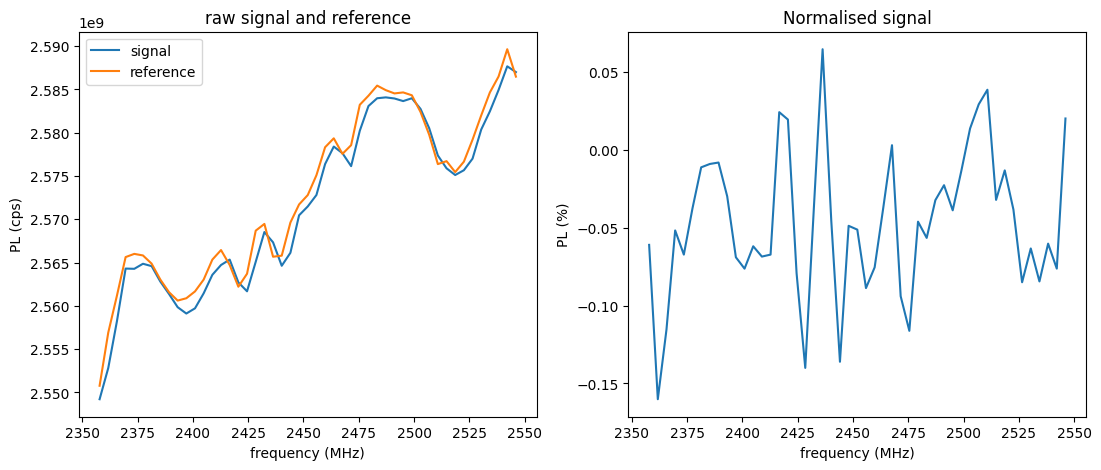

In [22]:
# Sweep over a range of magnetic fields and take ODMR spectra at each field
phi_list = np.linspace(45, 45, 5)
spectra_list = np.zeros((len(phi_list), ODMR.freq_num))
idx = 0
for phi in phi_list:
    qdm.magnet.set_b(190, 55.5, phi)
    # ODMR.multiple_measurements(number_of_measurements=3, plot_bool=False)
    # ODMR.average_result()
    # ODMR.plot_spectra(remove_start=2)
    ODMR.start(num_sweeps = 3, continue_meas = False)
    ODMR.get_results()
    ODMR.plot_spectra(remove_start=2)
    spectra_list[idx,::] = ODMR.norm_sum
    idx = idx + 1


Text(0, 0.5, 'phi (deg)')

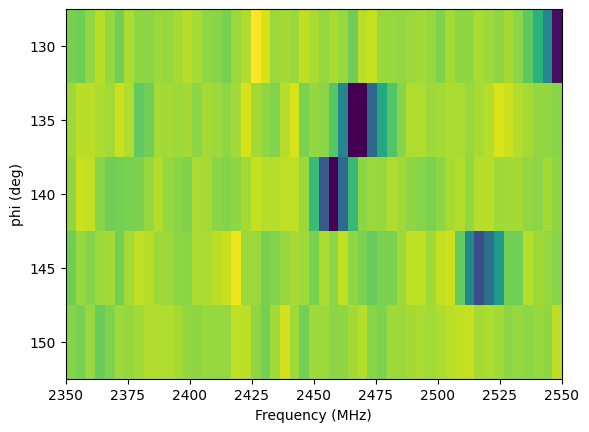

In [23]:
phi_step = phi_list[1] - phi_list[0]
# plot the spectra from the magnetic field sweep
plt.figure()
plt.imshow(spectra_list, aspect='auto', extent=[ODMR.freq_start, ODMR.freq_stop, phi_list[-1] + 0.5*phi_step, phi_list[0]-0.5*phi_step])
plt.xlabel("Frequency (MHz)")
plt.ylabel("phi (deg)")


In [13]:
# create an object of the ODMR measurement
ODMR = ESR(qdm, 
                 int_time = 30e-3,
                 freq_start = 2400,
                 freq_stop = 2600,
                 freq_num = 51,
                 ref_bool = True,
                 ref_type = "no_rf",) 

Sweeping to new field value. Estimated sweeping time: 2.43 (s)
Field has not been reached yet
Field has not been reached yet
Field has been reached
B = 190.043 (mT)
NV freq approx [2451.2, 8191.2] (MHz)
Measurement time per sweep:  3.06 (s)
Dead time per sweep: 0.55 (s)
50552832
50552832
Sweeping to new field value. Estimated sweeping time: 0.81 (s)
Field has not been reached yet
Field has not been reached yet
Field has been reached
B = 189.994 (mT)
NV freq approx [2449.8, 8189.8] (MHz)
Measurement time per sweep:  3.06 (s)
Dead time per sweep: 0.55 (s)
50552832
50552832
Sweeping to new field value. Estimated sweeping time: 0.82 (s)
Field has not been reached yet
Field has not been reached yet
Field has been reached
B = 189.990 (mT)
NV freq approx [2449.7, 8189.7] (MHz)
Measurement time per sweep:  3.06 (s)
Dead time per sweep: 0.55 (s)
50552832
50552832
Sweeping to new field value. Estimated sweeping time: 0.83 (s)
Field has not been reached yet
Field has not been reached yet
Field ha

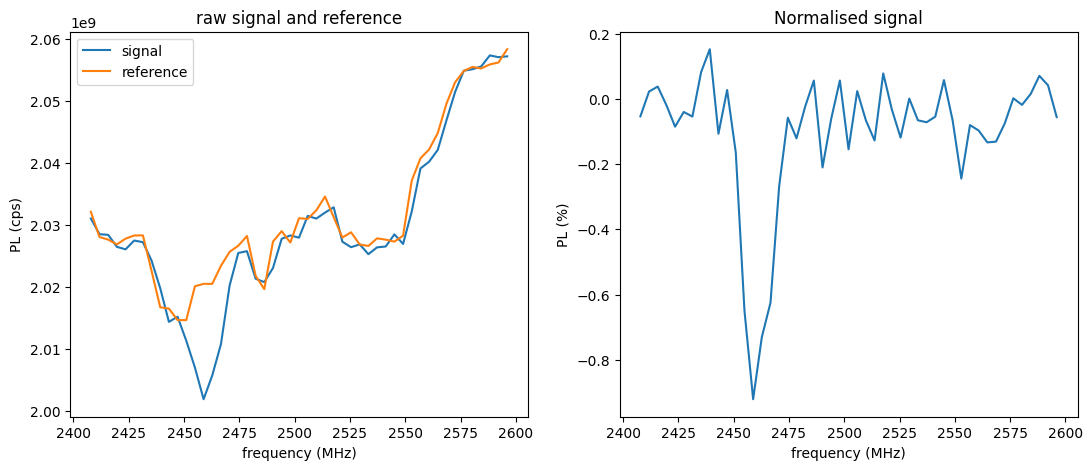

In [14]:
# Sweep over a range of magnetic fields and take ODMR spectra at each field
phi_list = np.linspace(45, 52, 7)
spectra_list = np.zeros((len(phi_list), ODMR.freq_num))
idx = 0
for phi in phi_list:
    qdm.magnet.set_b(190, 54.7, phi)
    # ODMR.multiple_measurements(number_of_measurements=3, plot_bool=False)
    # ODMR.average_result()
    # ODMR.plot_spectra(remove_start=2)
    ODMR.start(num_sweeps = 3, continue_meas = False)
    ODMR.get_results()
    ODMR.plot_spectra(remove_start=2)
    # ODMR.plot_spectra(remove_start=2)
    spectra_list[idx,::] = ODMR.norm_sum
    idx = idx + 1


Text(0, 0.5, 'phi (deg)')

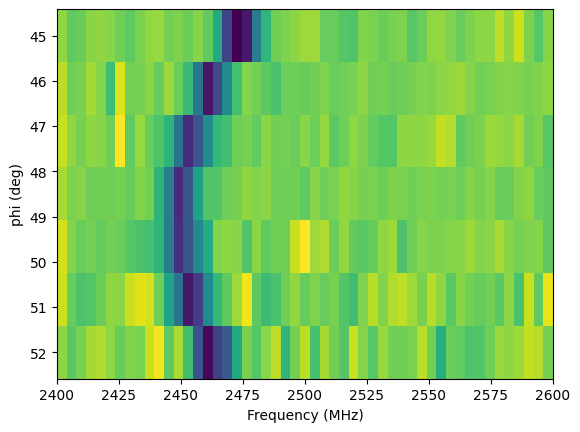

In [15]:
phi_step = phi_list[1] - phi_list[0]
# plot the spectra from the magnetic field sweep
plt.figure()
plt.imshow(spectra_list, aspect='auto', extent=[ODMR.freq_start, ODMR.freq_stop, phi_list[-1] + 0.5*phi_step, phi_list[0]-0.5*phi_step])
plt.xlabel("Frequency (MHz)")
plt.ylabel("phi (deg)")

Sweeping to new field value. Estimated sweeping time: 1.86 (s)
Field has been reached
B = 190.394 (mT)
NV freq approx [2461.0, 8201.0] (MHz)
Measurement time per sweep:  3.06 (s)
Dead time per sweep: 0.209 (s)
Sweeping to new field value. Estimated sweeping time: 0.31 (s)
Field has not been reached yet
Field has not been reached yet
Field has been reached
B = 189.943 (mT)
NV freq approx [2448.4, 8188.4] (MHz)
Measurement time per sweep:  3.06 (s)
Dead time per sweep: 0.209 (s)
Sweeping to new field value. Estimated sweeping time: 0.31 (s)
Field has not been reached yet
Field has not been reached yet
Field has been reached
B = 189.970 (mT)
NV freq approx [2449.2, 8189.2] (MHz)
Measurement time per sweep:  3.06 (s)
Dead time per sweep: 0.209 (s)
Sweeping to new field value. Estimated sweeping time: 0.31 (s)
Field has not been reached yet
Field has not been reached yet
Field has been reached
B = 189.960 (mT)
NV freq approx [2448.9, 8188.9] (MHz)
Measurement time per sweep:  3.06 (s)
Dead 

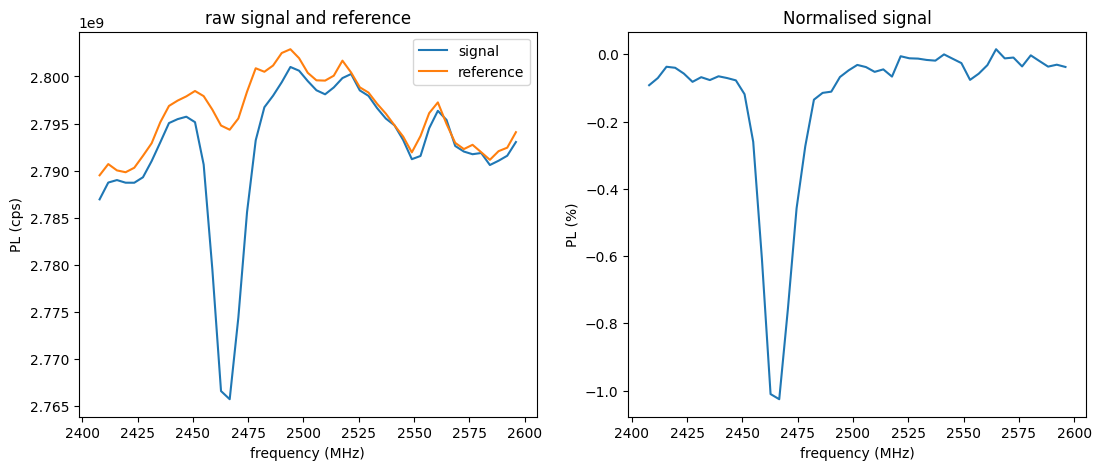

In [21]:
# Sweep over a range of magnetic fields and take ODMR spectra at each field
theta_list = np.linspace(53, 57, 8)
spectra_list = np.zeros((len(theta_list), ODMR.freq_num))
idx = 0
for theta in theta_list:
    qdm.magnet.set_b(190, theta, 49)
    ODMR.start(num_sweeps = 3, continue_meas = False)
    ODMR.get_results()
    ODMR.plot_spectra(remove_start=2)
    # ODMR.plot_spectra(remove_start=2)
    spectra_list[idx,::] = ODMR.norm_sum
    idx = idx + 1

Text(0, 0.5, 'theta (deg)')

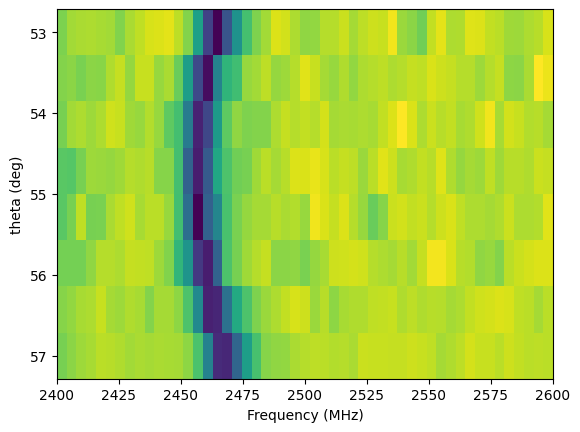

In [22]:
theta_step = theta_list[1] - theta_list[0]
# plot the spectra from the magnetic field sweep
plt.figure()
plt.imshow(spectra_list, aspect='auto', extent=[ODMR.freq_start, ODMR.freq_stop, theta_list[-1] + 0.5*theta_step, theta_list[0]-0.5*theta_step])
plt.xlabel("Frequency (MHz)")
plt.ylabel("theta (deg)")

In [23]:
qdm.magnet.set_b(5, 55.5, 49)

Sweeping to new field value. Estimated sweeping time: 42.23 (s)
Field has not been reached yet
Field has been reached
B = 5.114 (mT)
NV freq approx [2726.8, 3013.2] (MHz)


In [16]:

qdm.close()

No rf sourcce to close
No pulseblaster to close
Camera closed
Magnet closed
